In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1: Total FIRs per State**

	A bar chart comparing the Total FIRs across the top 10 states for the year.


<ipython-input-2-74887d12b3e0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=police_disposal_2021, x='States/UTs', y='Total # FIR', palette='viridis')


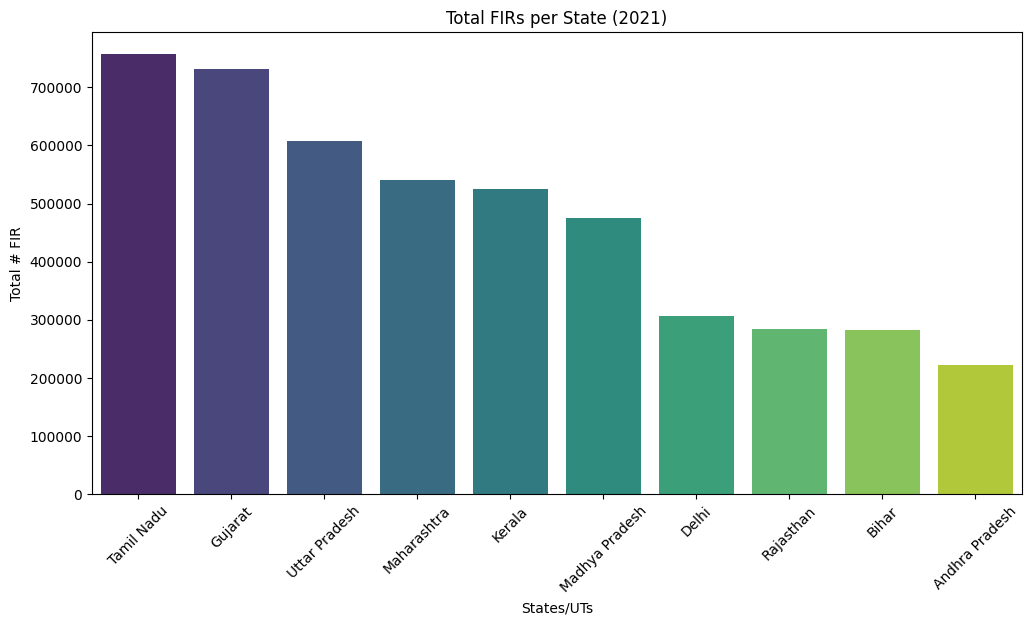

<ipython-input-2-74887d12b3e0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=police_disposal_2022, x='States/UTs', y='Total # FIR', palette='viridis')


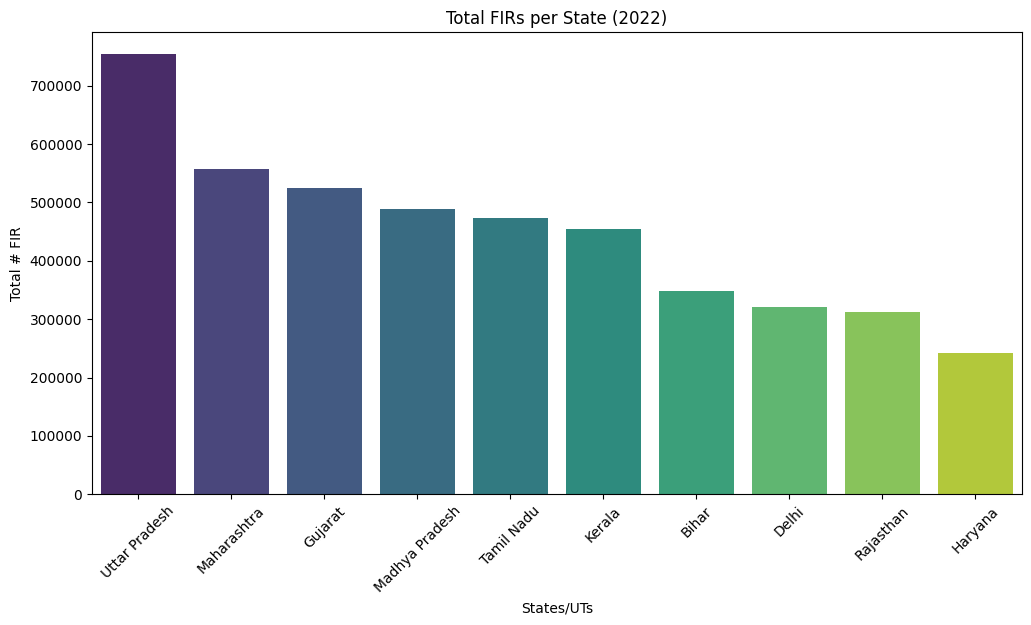

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


court_disposal_2021 = pd.read_excel('/content/drive/MyDrive/Dataset_EDA/1/Court Disposal 2021.xlsx')
court_disposal_2022 = pd.read_excel('/content/drive/My Drive/Dataset_EDA/1/Court Disposal 2022.xlsx')
police_disposal_2021 = pd.read_excel('/content/drive/MyDrive/Dataset_EDA/1/Police Disposal 2021.xlsx')
police_disposal_2022 = pd.read_excel('/content/drive/My Drive/Dataset_EDA/1/Police Disposal 2022.xlsx')


plt.figure(figsize=(12, 6))
sns.barplot(data=police_disposal_2021, x='States/UTs', y='Total # FIR', palette='viridis')
plt.title('Total FIRs per State (2021)')
plt.xlabel('States/UTs')
plt.ylabel('Total # FIR')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=police_disposal_2022, x='States/UTs', y='Total # FIR', palette='viridis')
plt.title('Total FIRs per State (2022)')
plt.xlabel('States/UTs')
plt.ylabel('Total # FIR')
plt.xticks(rotation=45)
plt.show()





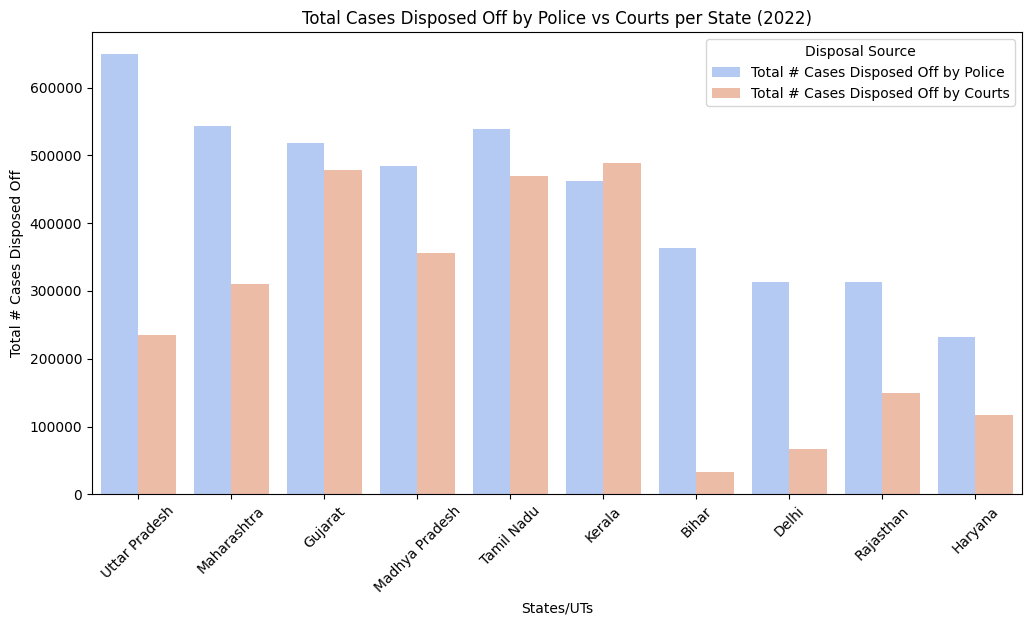

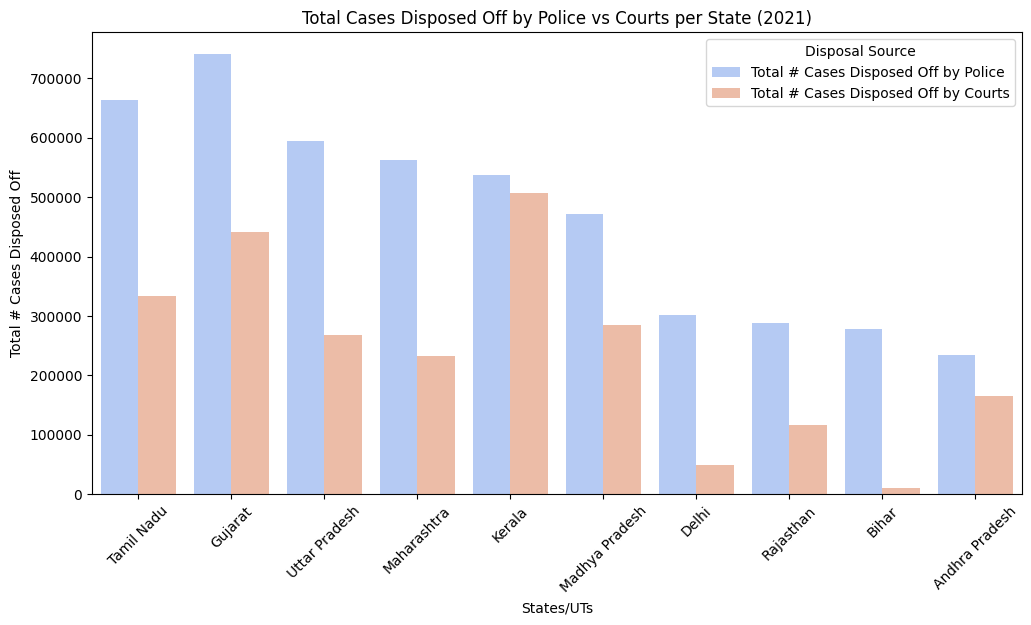

In [3]:
merged_data = police_disposal_2022[['States/UTs', 'Total # Cases Disposed Off by Police']].merge(
    court_disposal_2022[['States/UTs', 'Total # Cases Disposed Off by Courts']], on='States/UTs')

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data.melt(id_vars='States/UTs', value_vars=['Total # Cases Disposed Off by Police', 'Total # Cases Disposed Off by Courts']),
            x='States/UTs', y='value', hue='variable', palette='coolwarm')
plt.title('Total Cases Disposed Off by Police vs Courts per State (2022)')
plt.xlabel('States/UTs')
plt.ylabel('Total # Cases Disposed Off')
plt.xticks(rotation=45)
plt.legend(title='Disposal Source')
plt.show()

merged_data = police_disposal_2021[['States/UTs', 'Total # Cases Disposed Off by Police']].merge(
    court_disposal_2021[['States/UTs', 'Total # Cases Disposed Off by Courts']], on='States/UTs')

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data.melt(id_vars='States/UTs', value_vars=['Total # Cases Disposed Off by Police', 'Total # Cases Disposed Off by Courts']),
            x='States/UTs', y='value', hue='variable', palette='coolwarm')
plt.title('Total Cases Disposed Off by Police vs Courts per State (2021)')
plt.xlabel('States/UTs')
plt.ylabel('Total # Cases Disposed Off')
plt.xticks(rotation=45)
plt.legend(title='Disposal Source')
plt.show()




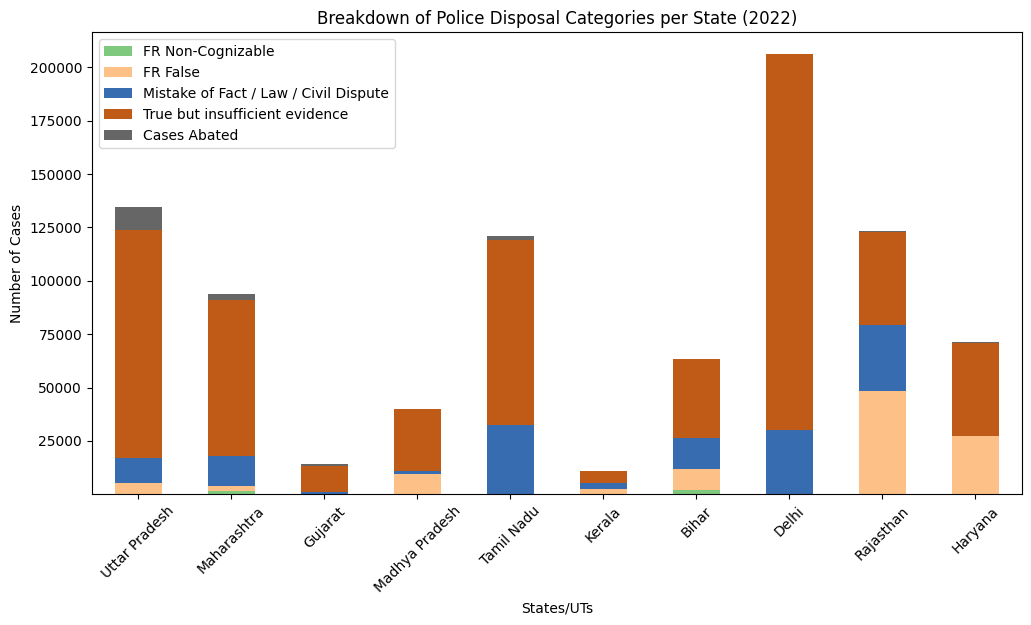

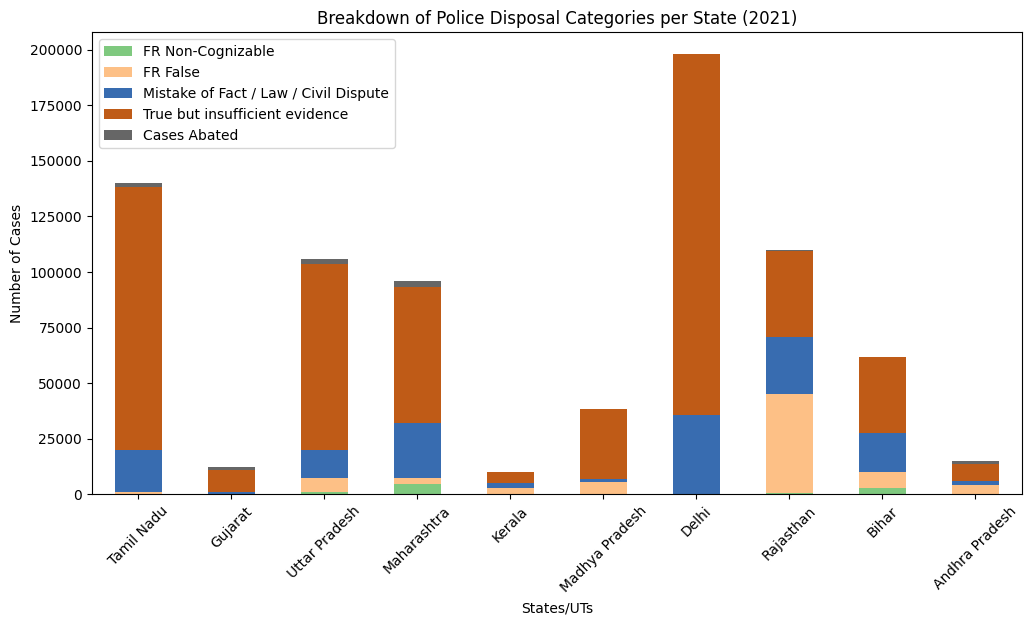

In [4]:
police_disposal_categories = police_disposal_2022[['States/UTs', 'FR Non-Cognizable', 'FR False', 'Mistake of Fact / Law / Civil Dispute',
                                                   'True but insufficient evidence', 'Cases Abated']]

police_disposal_categories.set_index('States/UTs').plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Breakdown of Police Disposal Categories per State (2022)')
plt.xlabel('States/UTs')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

police_disposal_categories = police_disposal_2021[['States/UTs', 'FR Non-Cognizable', 'FR False', 'Mistake of Fact / Law / Civil Dispute',
                                                   'True but insufficient evidence', 'Cases Abated']]

police_disposal_categories.set_index('States/UTs').plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Breakdown of Police Disposal Categories per State (2021)')
plt.xlabel('States/UTs')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()


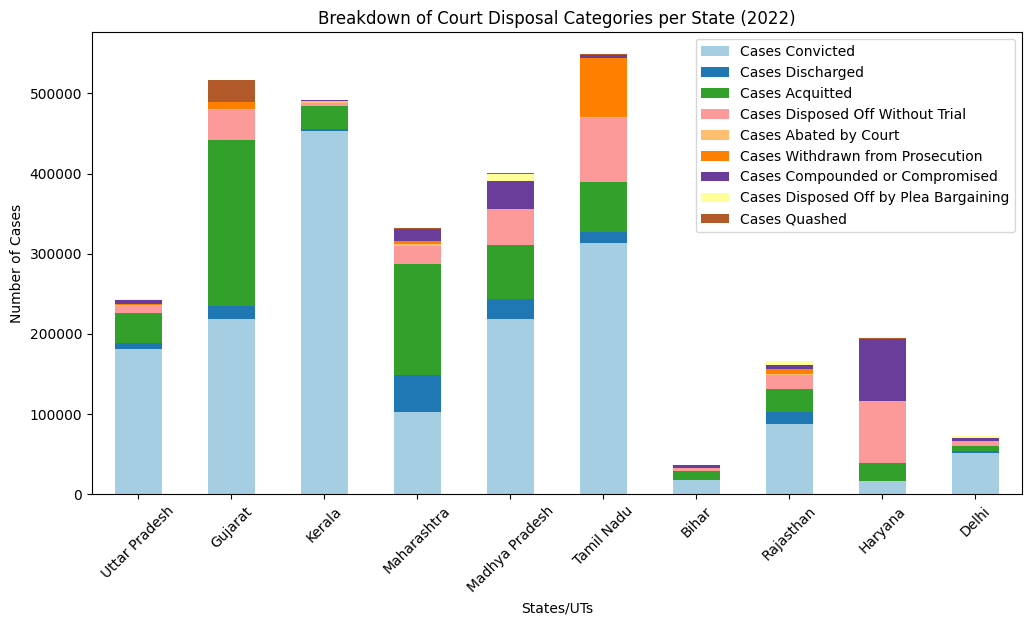

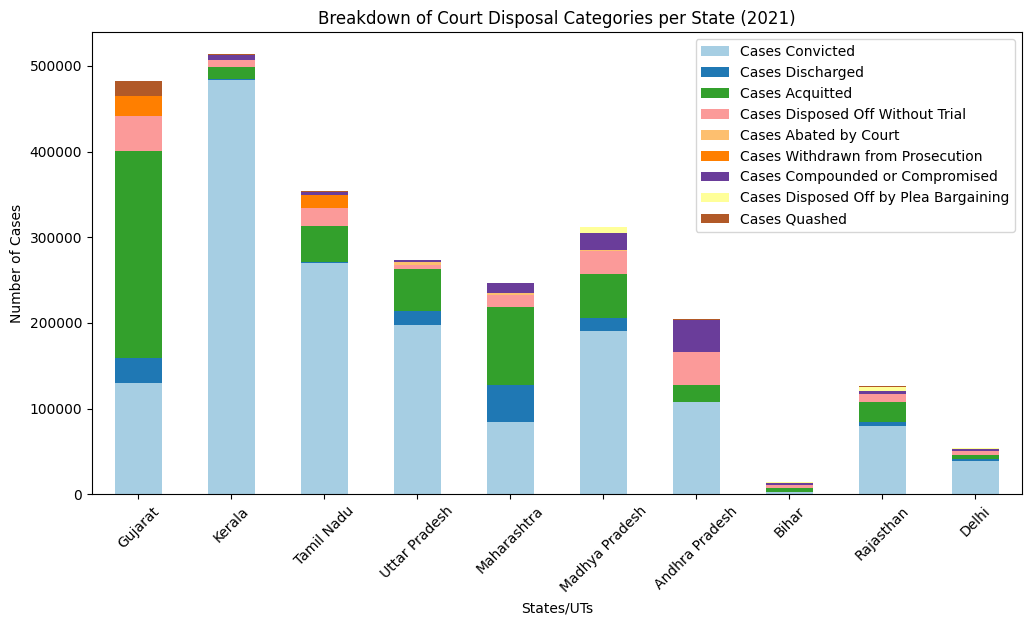

In [5]:
court_disposal_categories = court_disposal_2022[['States/UTs', 'Cases Convicted', 'Cases Discharged', 'Cases Acquitted',
                                                 'Cases Disposed Off Without Trial', 'Cases Abated by Court',
                                                 'Cases Withdrawn from Prosecution', 'Cases Compounded or Compromised',
                                                 'Cases Disposed Off by Plea Bargaining', 'Cases Quashed']]

court_disposal_categories.set_index('States/UTs').plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Breakdown of Court Disposal Categories per State (2022)')
plt.xlabel('States/UTs')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

court_disposal_categories = court_disposal_2021[['States/UTs', 'Cases Convicted', 'Cases Discharged', 'Cases Acquitted',
                                                 'Cases Disposed Off Without Trial', 'Cases Abated by Court',
                                                 'Cases Withdrawn from Prosecution', 'Cases Compounded or Compromised',
                                                 'Cases Disposed Off by Plea Bargaining', 'Cases Quashed']]

court_disposal_categories.set_index('States/UTs').plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Breakdown of Court Disposal Categories per State (2021)')
plt.xlabel('States/UTs')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()


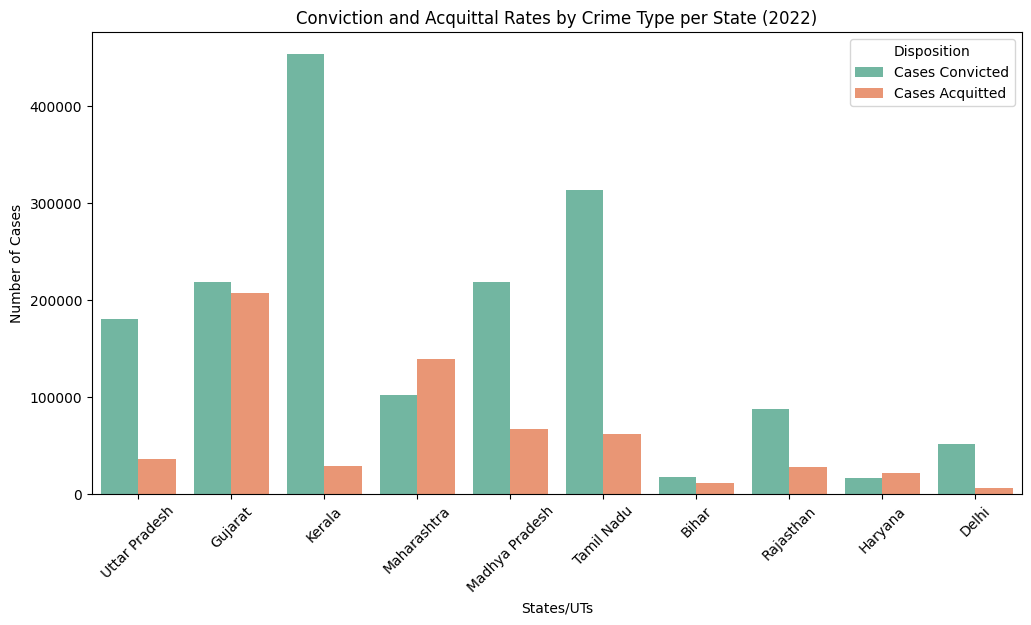

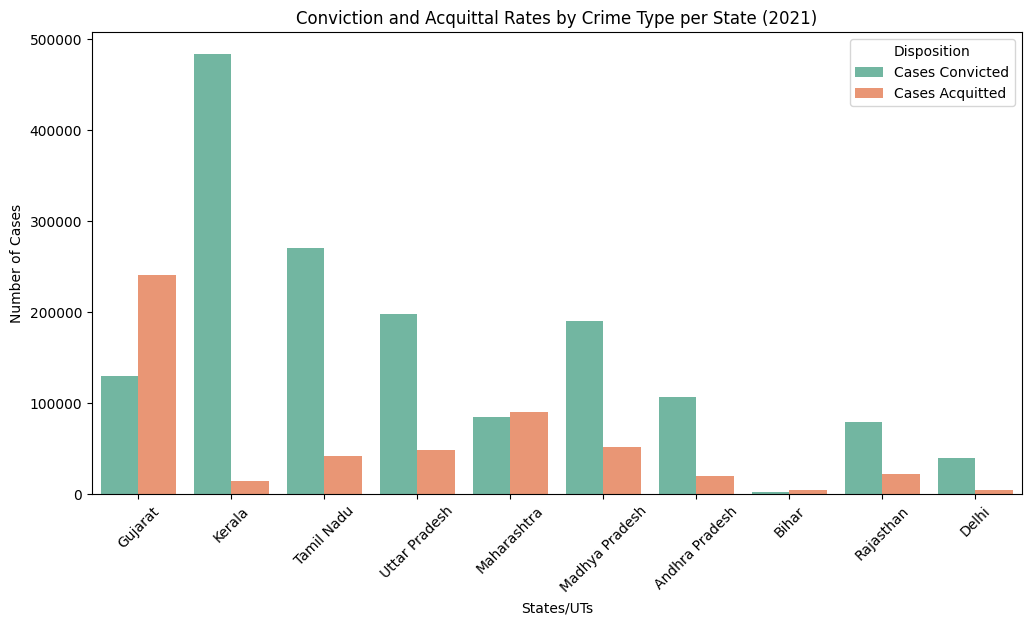

In [6]:
conviction_acquittal_data = court_disposal_2022[['States/UTs', 'Crime Type', 'Cases Convicted', 'Cases Acquitted']]

plt.figure(figsize=(12, 6))
sns.barplot(data=conviction_acquittal_data.melt(id_vars=['States/UTs', 'Crime Type'], value_vars=['Cases Convicted', 'Cases Acquitted']),
            x='States/UTs', y='value', hue='variable', palette='Set2')
plt.title('Conviction and Acquittal Rates by Crime Type per State (2022)')
plt.xlabel('States/UTs')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Disposition')
plt.show()

conviction_acquittal_data = court_disposal_2021[['States/UTs', 'Crime Type', 'Cases Convicted', 'Cases Acquitted']]

plt.figure(figsize=(12, 6))
sns.barplot(data=conviction_acquittal_data.melt(id_vars=['States/UTs', 'Crime Type'], value_vars=['Cases Convicted', 'Cases Acquitted']),
            x='States/UTs', y='value', hue='variable', palette='Set2')
plt.title('Conviction and Acquittal Rates by Crime Type per State (2021)')
plt.xlabel('States/UTs')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Disposition')
plt.show()



<ipython-input-7-bbf28cd8afd3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=court_disposal_2022, x='States/UTs', y='Completion Rate (%)', palette='copper')


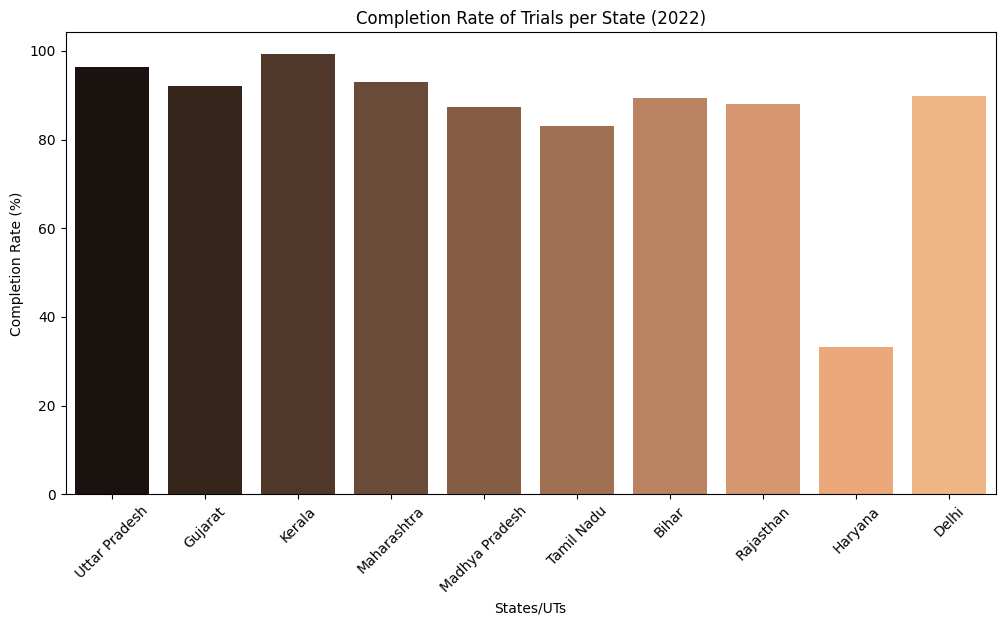

<ipython-input-7-bbf28cd8afd3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=court_disposal_2021, x='States/UTs', y='Completion Rate (%)', palette='copper')


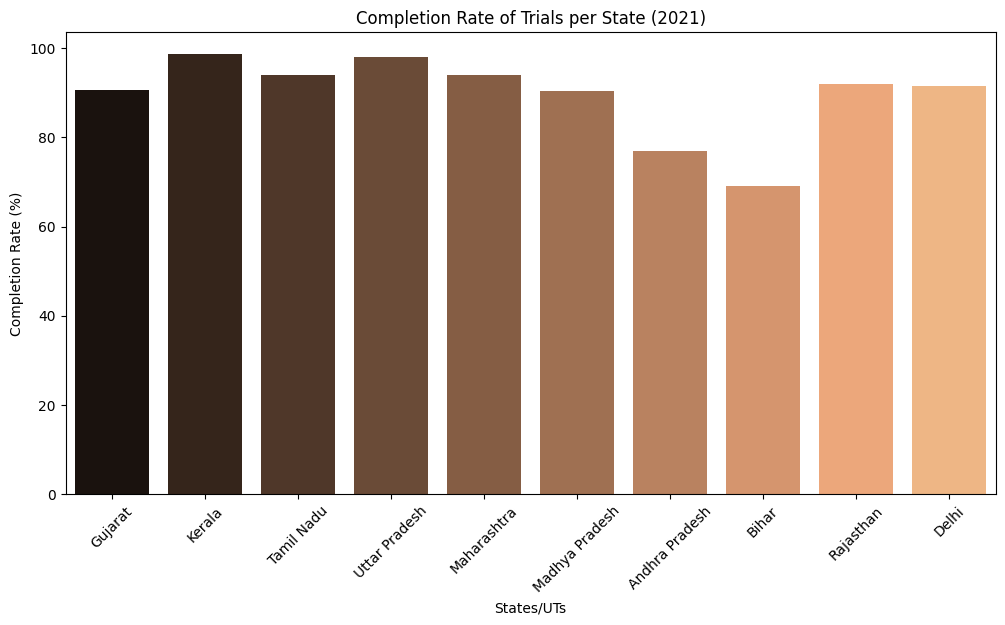

In [7]:
court_disposal_2022['Completion Rate (%)'] = (court_disposal_2022['Cases Where Trials Were Completed'] /
                                              court_disposal_2022['Total # Cases Disposed Off by Courts']) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=court_disposal_2022, x='States/UTs', y='Completion Rate (%)', palette='copper')
plt.title('Completion Rate of Trials per State (2022)')
plt.xlabel('States/UTs')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.show()

court_disposal_2021['Completion Rate (%)'] = (court_disposal_2021['Cases Where Trials Were Completed'] /
                                              court_disposal_2021['Total # Cases Disposed Off by Courts']) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=court_disposal_2021, x='States/UTs', y='Completion Rate (%)', palette='copper')
plt.title('Completion Rate of Trials per State (2021)')
plt.xlabel('States/UTs')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.show()



